In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=18,9
import seaborn as sns

In [3]:
monthly_data = pd.read_csv("Monthly_data_cmo.csv")
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [4]:
monthly_data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [6]:
monthly_data.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

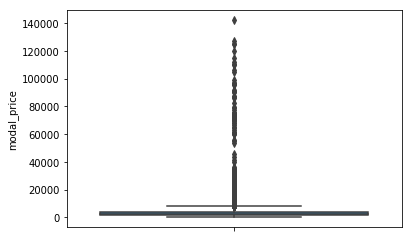

In [5]:
a = sns.boxplot(y="modal_price", data=monthly_data, whis=1.5)

In [8]:
from scipy.stats import iqr

In [6]:
Q1 = monthly_data.modal_price.quantile(0.25)
Q3 = monthly_data.modal_price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2807.0


In [7]:
monthly_data.loc[monthly_data['modal_price'] < (Q1 - 1.5 * IQR), 'modal_price']
monthly_data.loc[~(monthly_data['modal_price'] > (Q3 + 1.5 * IQR)), 'modal_price']

0        1463
1        1875
2        1731
3        1999
4        1900
5        2119
6        1373
7        1375
8        3647
9        5216
10       7150
11       7500
12       5233
13       7329
14       5700
15       7500
16       3313
17       3150
18       3603
19       3263
20       5500
21       2500
22       1133
23       3000
24       2138
25       1250
26       5750
27       5250
28       2833
29       1500
         ... 
62399    1994
62400    1771
62401    1400
62402    7949
62403    5800
62404    6419
62405    1041
62406     451
62407    1272
62408    1707
62409    2314
62410    1161
62411    2529
62412    1244
62413    2009
62414    2387
62415    1313
62416    6761
62417    6275
62418    4300
62419    2650
62420    1400
62421    1800
62422    1967
62423    1267
62424    6200
62425    5000
62426    6400
62427    2633
62428    3067
Name: modal_price, Length: 59896, dtype: int64

In [13]:
from datetime import datetime
monthly_data['date'] = pd.to_datetime(monthly_data['date'])
monthly_data.index = monthly_data['date']

#The data is not sorted by date and also the date is repetitive for each commodity for each apmc
monthly_data.sort_values(by='date', inplace=True)
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
date,,,,,,,,,,,
2014-09-01,Kurdwadi,Sorgum(Jawar),2014,September,454,1353,2610,1981,2014-09-01,Solapur,Maharashtra
2014-09-01,Satara,Ladies Finger,2014,September,128,2435,3261,2848,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,Potato,2014,September,2988,2175,2488,2331,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,Ginger (Fresh),2014,September,199,3438,4813,4125,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,Ground Nut Pods (Dry),2014,September,1,3000,4000,3500,2014-09-01,Satara,Maharashtra


In [14]:
monthly_data['Commodity'] = [i.lower() for i in monthly_data.Commodity.values]

<h3>Plotting a time series plot for a region does not give fruitful results as a specific region may have many commodities, and hence will not give genuine insights</h3>

C:\Users\Saumya\Anaconda\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


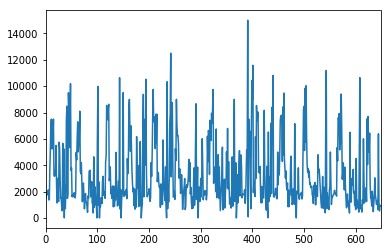

In [9]:
sns.tsplot(monthly_data.loc[monthly_data["APMC" ]== "Ahmednagar","modal_price"])

Firstly check which apmc has high frequency and also check frequency for the commodities in that region

In [10]:
monthly_data.APMC.value_counts()

Mumbai                    1538
Pune                      1513
Nagpur                    1340
Barshi                    1076
Jalgaon                   1055
Solapur                    984
Kamthi                     967
Shrirampur                 947
Kalyan                     932
Pune-Manjri                930
Aurangabad                 918
Rahata                     848
Karad                      831
Amarawati                  817
Kolhapur                   816
Nashik                     750
Pune-Pimpri                681
Ahmednagar                 649
Ramtek                     621
Satara                     549
Akluj                      542
Osmanabad                  510
Sangali                    462
Ratanagari                 457
Manchar                    455
Chandrapur-Ganjwad         454
Dhule                      434
Vadgaon Peth               415
Kalmeshwar                 415
Kalamb (Os)                407
                          ... 
Hingoli-Kanegaon Naka       13
Shirala 

In [15]:
monthly_data.query('APMC == "Mumbai"').Commodity.value_counts()

Sweet Potato        26
Cummin              26
Squash Gourd        26
Cabbage             26
Split Lentil        26
Fennel              26
Rice(Paddy-Hus)     26
Capsicum            26
Green Chilli        26
Cowpea              26
Coriander (Dry)     26
Tomato              26
Spilt Gerrn Gram    26
Shevga              26
Cucumber            26
Ginger (Dry)        26
Snake Gourd         26
Turmeric            26
Small Gourd         26
Curry Leaves        26
Coconut             26
Split Black Gram    26
Cardamom            26
Ladies Finger       26
Green-Peas          26
Jaggery             26
Brinjal             26
Green Peas (Dry)    26
Arvi                26
Cashewnuts          26
                    ..
FRENCH BEAN          1
SWEET POTATO         1
SQUASH GOURD         1
TURMERIC             1
CORIANDER (DRY)      1
GREEN-PEAS           1
SPLIT BLACK GRAM     1
JAGGERY              1
COCONUT              1
GREEN PEAS (DRY)     1
LADIES FINGER        1
SPILT GERRN GRAM     1
CARROT     

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Saumya\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


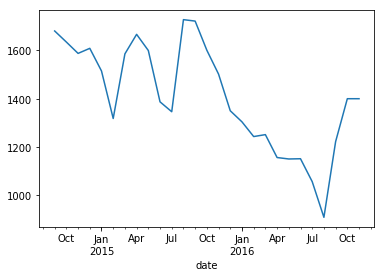

In [15]:
monthly_data.query('APMC == "Mumbai" & Commodity == "coconut"').modal_price.plot()

Seasonality:  AxesSubplot(0.125,0.2;0.775x0.68)


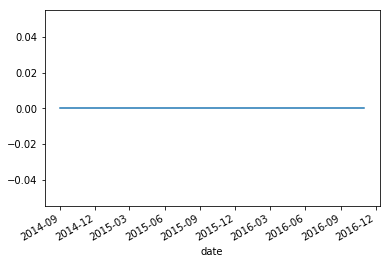

In [16]:
result = seasonal_decompose(monthly_data.query('APMC == "Ahmednagar" & Commodity == "bajri"').modal_price, model='additive', freq=1)
print("Seasonality: ",result.seasonal.plot())

In [27]:
monthly_data.query('APMC == "Pune"').Commodity.value_counts()

Walvad              26
Brinjal             26
Ghosali(Bhaji)      26
Bajri               26
Green-Peas          26
Chavli (Shenga )    26
Snake Gourd         26
Cucumber            26
Ladies Finger       26
Ghevda              26
Onion               26
Flower              26
Squash Gourd        26
Cabbage             26
Rice(Paddy-Hus)     26
Green Peas (Dry)    26
Potato              26
Wal Bhaji           26
Small Gourd         26
Pavtta              26
Capsicum            26
Green Chilli        26
Sorgum(Jawar)       26
Tomato              26
Sweet Potato        26
Cluster Bean        26
Wheat(Husked)       26
Wal Papdi           26
Shevga              26
Bottle Gourd        26
                    ..
CUCUMBER             1
WHEAT(HUSKED)        1
TOMATO               1
SHEVGA               1
Mango                1
WAL BHAJI            1
BLACK GRAM           1
SQUASH GOURD         1
Terda                1
SMALL GOURD          1
GREEN PEAS (DRY)     1
LADIES FINGER        1
GHEVDA     

Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


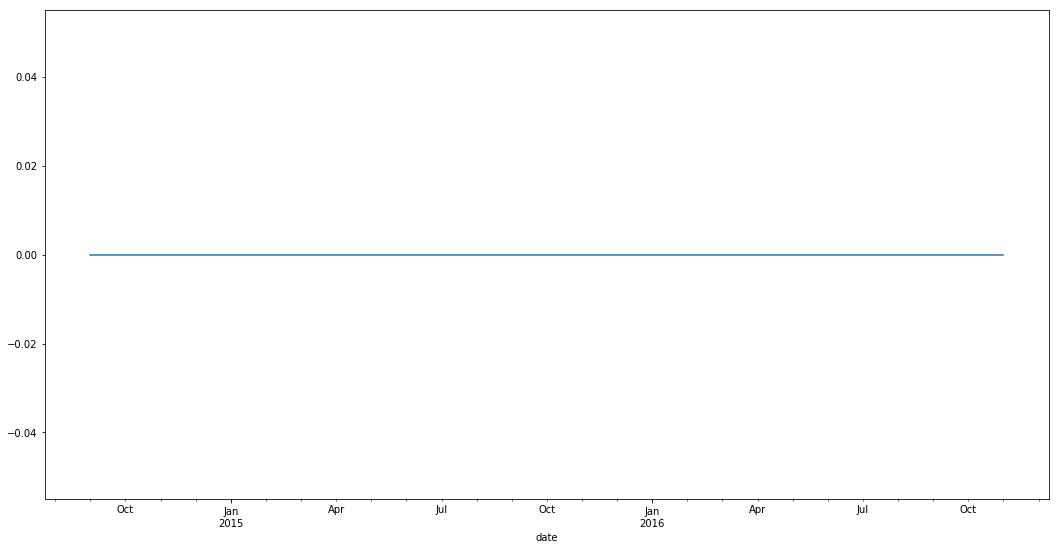

In [65]:
result = seasonal_decompose(monthly_data.query('APMC == "Pune" & Commodity == "pavtta"').modal_price, model='additive', freq=1)
print("Seasonality: ",result.seasonal.plot())

In [29]:
monthly_data.query('APMC == "Satara"').Commodity.value_counts()

Garlic                   44
Flower                   26
Ladies Finger            26
Cabbage                  26
Pavtta                   26
Cucumber                 26
Brinjal                  26
Potato                   26
Cluster Bean             26
Bottle Gourd             26
Capsicum                 26
Ginger (Fresh)           26
Tomato                   26
Green Chilli             26
Onion                    26
Bitter Gourd             26
Shevga                   25
Green-Peas               25
Carrot                   18
Ghevda                   15
Ground Nut Pods (Dry)     7
Sweet Potato              6
GINGER (FRESH)            1
CARROT                    1
BOTTLE GOURD              1
ONION                     1
BRINJAL                   1
GREEN-PEAS                1
PAVTTA                    1
GARLIC                    1
BITTER GOURD              1
CUCUMBER                  1
LADIES FINGER             1
GREEN CHILLI              1
FLOWER                    1
TOMATO              

Seasonality:  AxesSubplot(0.125,0.2;0.775x0.68)


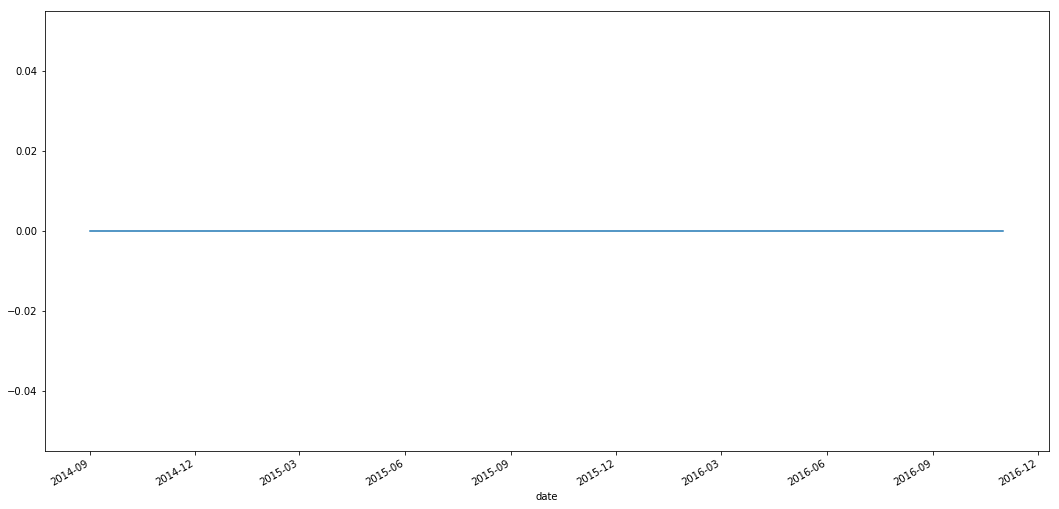

In [66]:
result = seasonal_decompose(monthly_data.query('APMC == "Satara" & Commodity == "garlic"').modal_price, model='additive', freq=1)
print("Seasonality: ",result.seasonal.plot())

<h3>The seasonality cannot be seen per commodity for a particular region as the data points are less that way.
So, we take sum of all commodities for a region and check monthly seasonality.</h3>

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


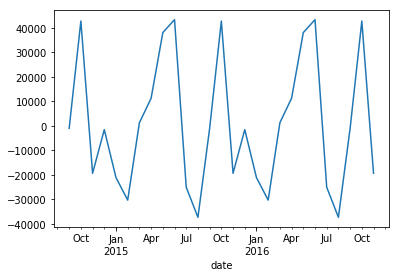

In [17]:
result = seasonal_decompose(monthly_data.query('APMC == "Mumbai"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


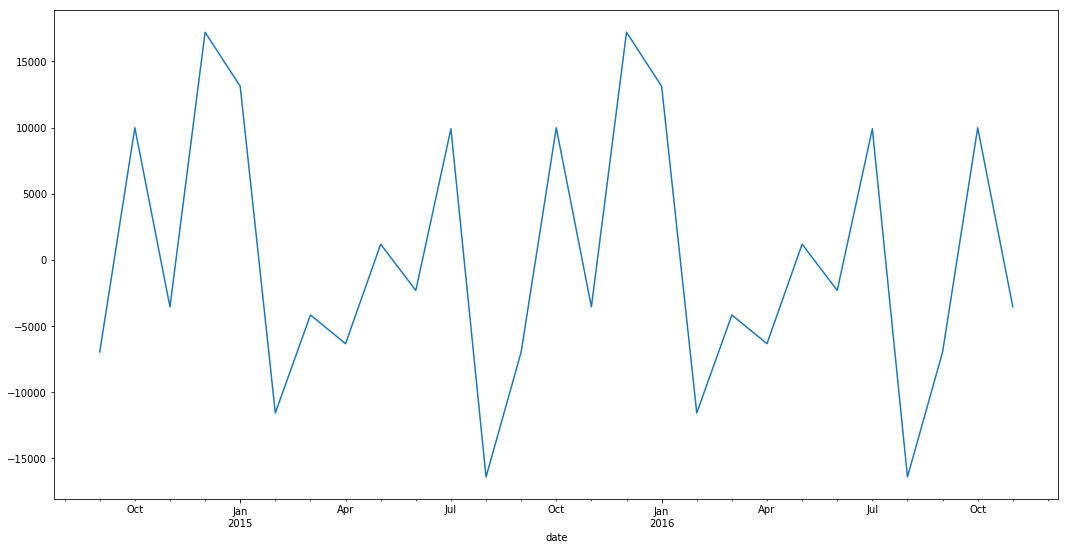

In [32]:
result = seasonal_decompose(monthly_data.query('APMC == "Pune"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


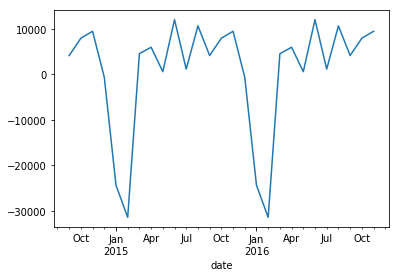

In [18]:
result = seasonal_decompose(monthly_data.query('APMC == "Nagpur"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


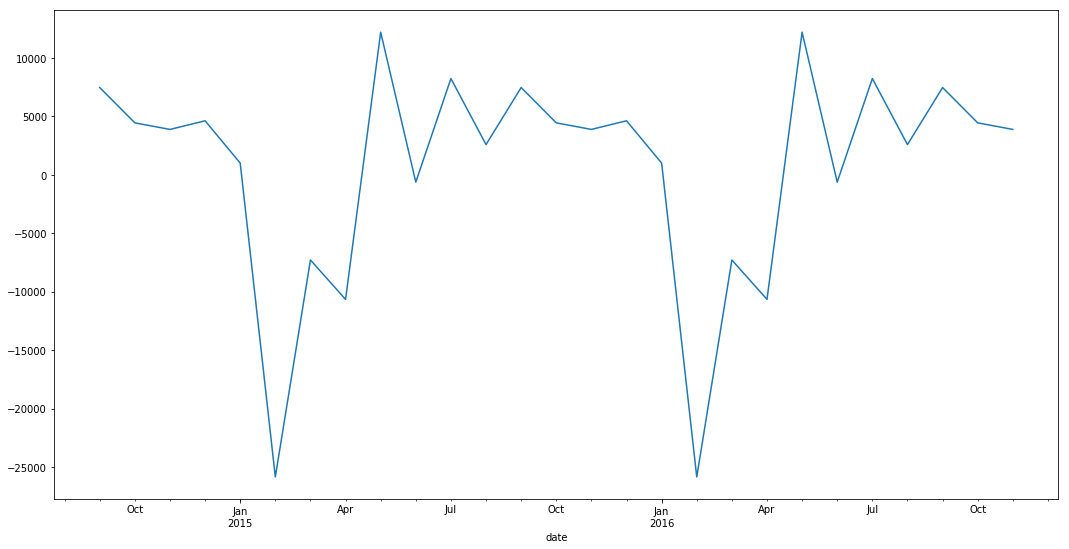

In [34]:
result = seasonal_decompose(monthly_data.query('APMC == "Barshi"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


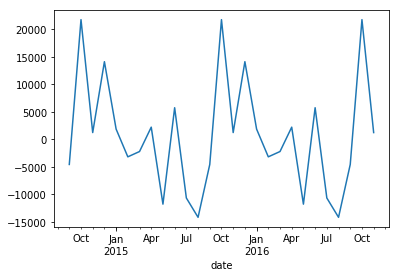

In [19]:
result = seasonal_decompose(monthly_data.query('APMC == "Jalgaon"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


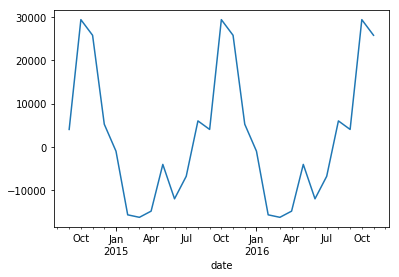

In [20]:
result = seasonal_decompose(monthly_data.query('APMC == "Solapur"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

After looking at seasonality accross APMC's for all commodities, we look at seasonality for top 5 commodities, accross the state.

In [37]:
monthly_data.Commodity.value_counts()

Gram                     3972
Wheat(Husked)            3946
Sorgum(Jawar)            3560
Soybean                  3545
Pigeon Pea (Tur)         3389
Maize                    2422
Green Gram               2294
Bajri                    2250
Onion                    1796
Black Gram               1557
Ground Nut Pods (Dry)    1045
Cotton                    990
Tomato                    975
Brinjal                   961
Ladies Finger             877
Paddy-Unhusked            870
Cabbage                   851
Green Chilli              802
Cucumber                  797
Flower                    784
Bitter Gourd              784
Potato                    687
Cluster Bean              664
Rice(Paddy-Hus)           640
Capsicum                  625
Bottle Gourd              570
Garlic                    557
Pomegranate               539
Sesamum                   526
Ginger (Fresh)            496
                         ... 
FIG                         1
Punvad                      1
NACHANI   

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


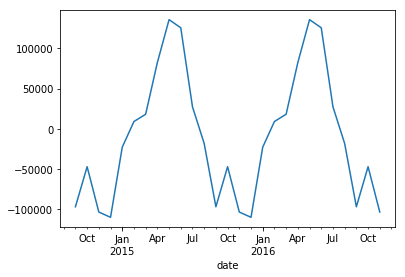

In [21]:
result = seasonal_decompose(monthly_data.query('Commodity == "gram"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


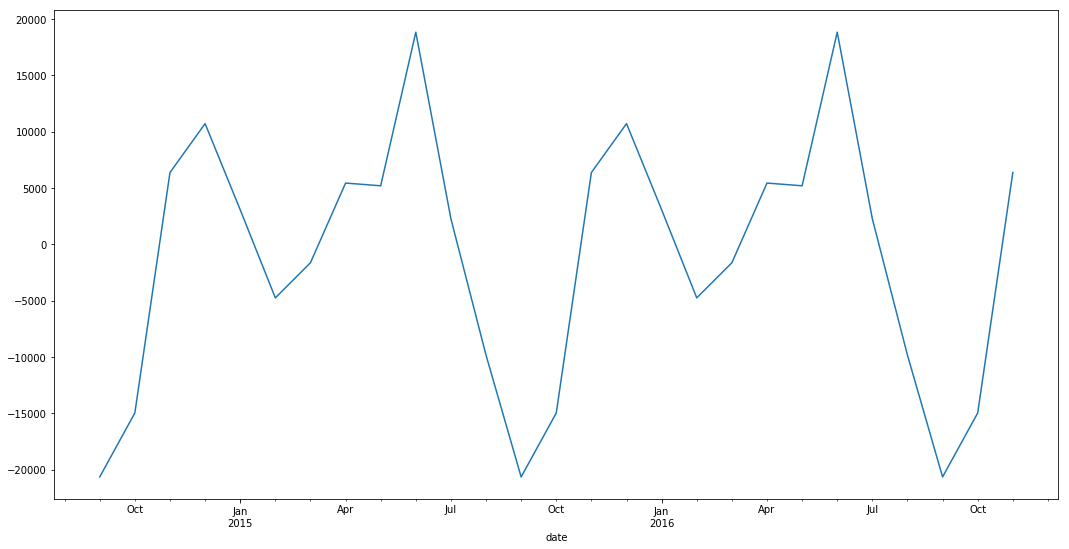

In [68]:
result = seasonal_decompose(monthly_data.query('Commodity == "wheat(husked)"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


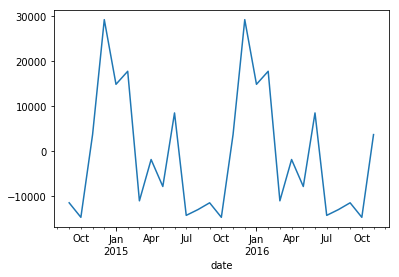

In [22]:
result = seasonal_decompose(monthly_data.query('Commodity == "sorgum(jawar)"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


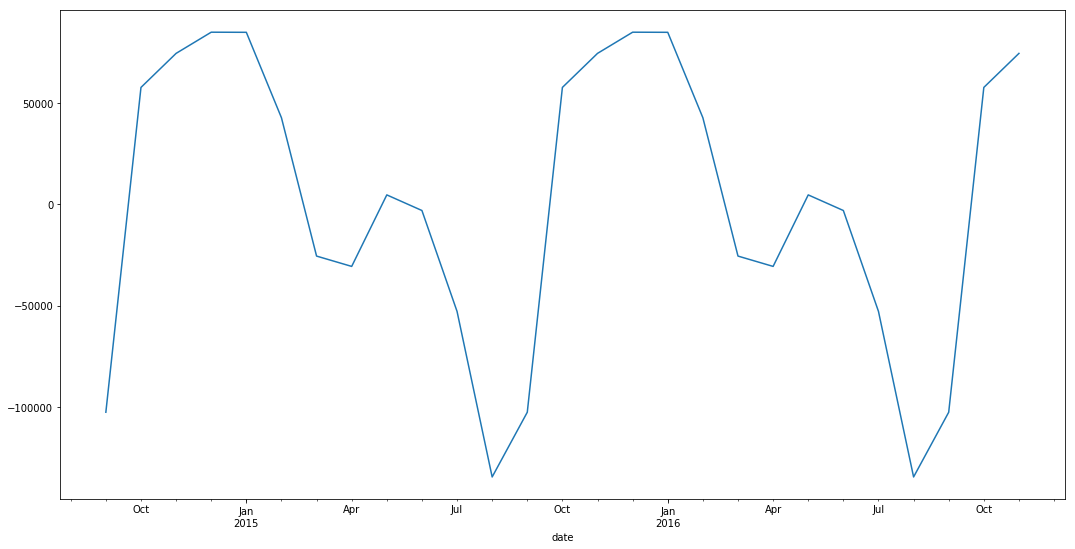

In [69]:
result = seasonal_decompose(monthly_data.query('Commodity == "soybean"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


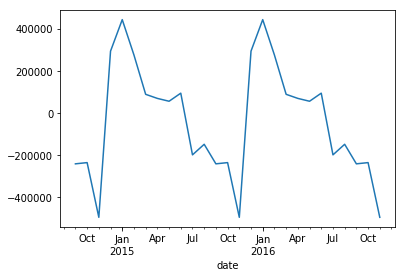

In [23]:
result = seasonal_decompose(monthly_data.query('Commodity == "pigeon pea (tur)"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.seasonal.plot())

In all seasonality graphs, it is evident that the seasonality is yearly and is dependent on the type of crop the commodity is. Some crops which are grown in the Rabi or summer season, such as Jawar, are then harvested in the winter season and sold then, indicating a price hike in the winter months. 

Similarly, there are crops such as Tur, are kharif crops grown during the rainy season, which lasts from June to October, post which we can see a hike in prices as the commodity reaches the market.

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


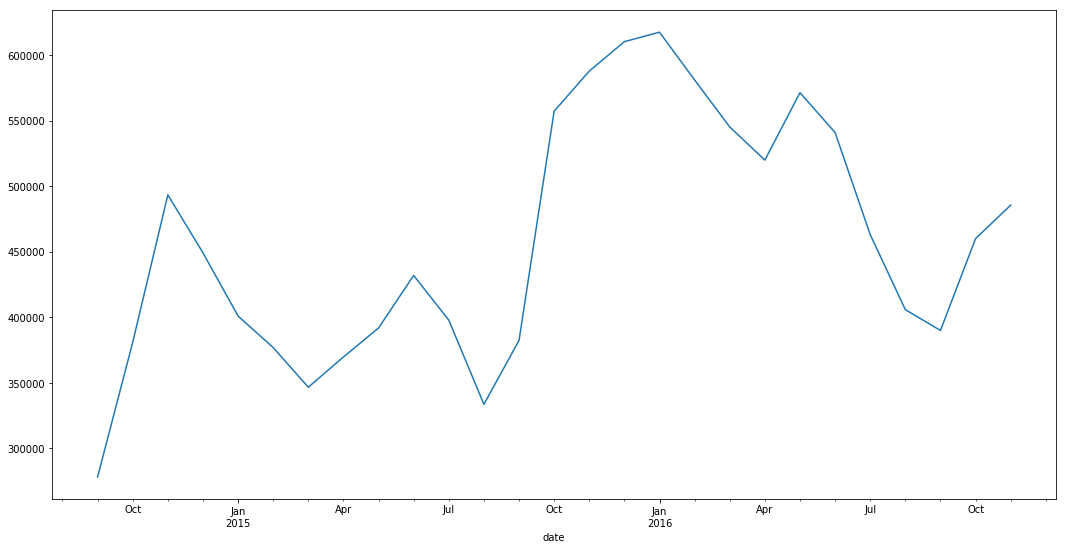

In [71]:
result = seasonal_decompose(monthly_data.query('Commodity == "soybean"').groupby("date").sum().modal_price, model='additive', freq=12)
print("Seasonality: ",result.observed.plot())

Looking at the trend and observed line plot of the commodities, we can safely conclude that the seasonality type is neither additive nor multiplicative and is irrespective of the model chosen for decomposing.

In [72]:
deseason = monthly_data.query('Commodity == "soybean"').groupby("date").sum().modal_price.pct_change()

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Seasonality:  AxesSubplot(0.125,0.125;0.775x0.755)


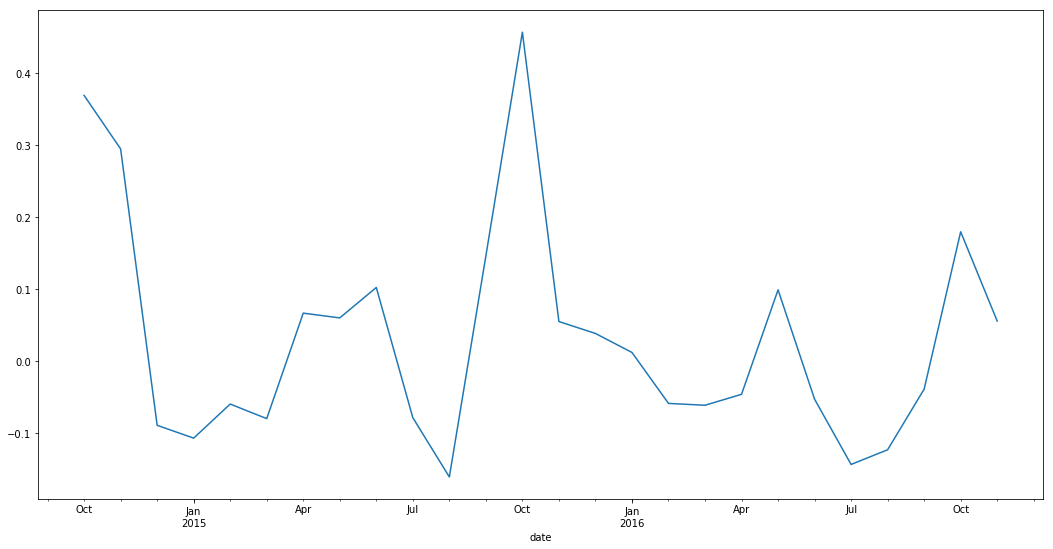

In [73]:
result = seasonal_decompose(deseason.iloc[1:], model='additive', freq=12)
print("Seasonality: ",result.observed.plot())

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


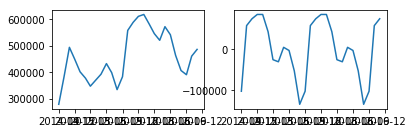

In [40]:
plt.subplot(221)
#plt.subplot(211)
result = seasonal_decompose(monthly_data.query('Commodity == "soybean"').groupby("date").sum().modal_price, model='additive', freq=12)
#(seasonal_decompose(deseason.iloc[1:], model='additive', freq=12)
plt.plot(result.observed)
plt.subplot(222)
plt.plot(result.seasonal)

In [79]:
seasonal_decompose(monthly_data.query('Commodity == "soybean"').groupby("date").sum().modal_price, model='additive', freq=12)

C:\Users\Saumya\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
